## Read csv file and save it as data frame

In [97]:
import pandas as pd
import numpy as np

df = pd.read_csv('AdmissionPredict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4,4.0,4.5,8.87,1,NaN
2,3,316.0,NaN,3,3.0,3.5,8.00,1,0.72
3,4,NaN,110.0,3,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2,2.0,3.0,8.21,0,0.65


## Check NaN fields

In [98]:
df.isnull().sum()

Serial No.            0
GRE Score            22
TOEFL Score          20
University Rating     0
SOP                   0
LOR                   0
CGPA                 20
Research              0
Chance of Admit      16
dtype: int64

## Exclude Chance of Admit NaN cells

In [99]:
df = df[df['Chance of Admit'].notna()]
df2 = df

## Method 1 filling NaN values

In [100]:
df['GRE Score'].fillna(int(df['GRE Score'].mean()), inplace=True)
df['TOEFL Score'].fillna(int(df['TOEFL Score'].mean()), inplace=True)
df['CGPA'].fillna(df['CGPA'].mean(), inplace=True)

## Method 2 filling NaN values

In [101]:
df2['GRE Score'].fillna(int(df2['GRE Score'].median()), inplace=True)
df2['TOEFL Score'].fillna(int(df2['TOEFL Score'].median()), inplace=True)
df2['CGPA'].fillna(df2['CGPA'].median(), inplace=True)

Mean is good when the values are close to each other

Median is good when the values aren't close to each other

## Correlation of columns

In [102]:
df.corr().style.background_gradient(cmap='coolwarm')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.101412,-0.149120,-0.162320,-0.150616,-0.078713,-0.057292,-0.067161,0.047057
GRE Score,-0.101412,1.000000,0.807123,0.658515,0.604036,0.539428,0.788450,0.572515,0.784770
TOEFL Score,-0.149120,0.807123,1.000000,0.675345,0.631699,0.543653,0.800425,0.496663,0.758711
University Rating,-0.162320,0.658515,0.675345,1.000000,0.735077,0.652685,0.734636,0.437787,0.707191
SOP,-0.150616,0.604036,0.631699,0.735077,1.000000,0.731139,0.703744,0.442234,0.680752
LOR,-0.078713,0.539428,0.543653,0.652685,0.731139,1.000000,0.659490,0.389778,0.663452
CGPA,-0.057292,0.788450,0.800425,0.734636,0.703744,0.659490,1.000000,0.512595,0.855648
Research,-0.067161,0.572515,0.496663,0.437787,0.442234,0.389778,0.512595,1.000000,0.548443
Chance of Admit,0.047057,0.784770,0.758711,0.707191,0.680752,0.663452,0.855648,0.548443,1.000000


## Plot features according to their chance of admit

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit'>

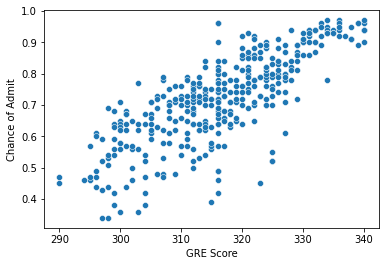

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='GRE Score', y='Chance of Admit')

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admit'>

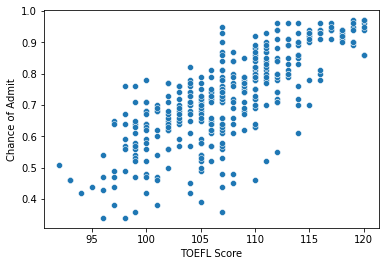

In [104]:
sns.scatterplot(data=df, x='TOEFL Score', y='Chance of Admit')

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit'>

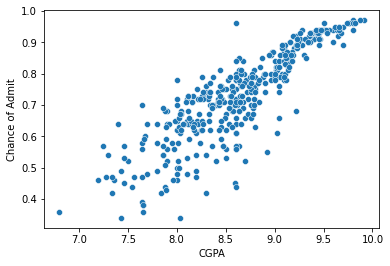

In [105]:
sns.scatterplot(data=df, x='CGPA', y='Chance of Admit')

<AxesSubplot:xlabel='SOP', ylabel='Chance of Admit'>

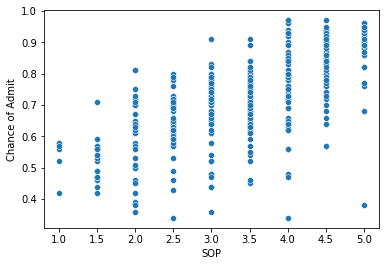

In [106]:
sns.scatterplot(data=df, x='SOP', y='Chance of Admit')

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit'>

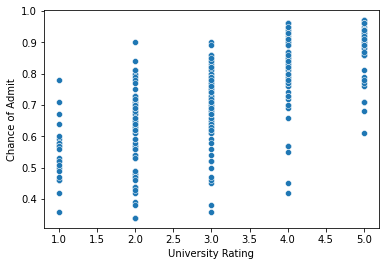

In [107]:
sns.scatterplot(data=df, x='University Rating', y='Chance of Admit')

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit'>

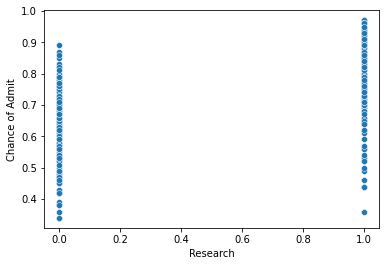

In [108]:
sns.scatterplot(data=df, x='Research', y='Chance of Admit')

## Split data frame into test and train

In [109]:
from sklearn.model_selection import train_test_split

X = df.drop(['Serial No.', 'Chance of Admit'], axis=1).values
Y = df['Chance of Admit'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(307, 7) (77, 7) (307,) (77,)


# Regression

## Calculating theta

In [110]:
from numpy.linalg import inv 

X_train_trans = np.transpose(X_train)
theta = np.matmul(np.matmul(inv(np.matmul(X_train_trans, X_train)), X_train_trans), Y_train)
theta 

array([-0.00242767,  0.0019773 ,  0.02191988,  0.00227658,  0.01817202,
        0.12929138,  0.05977553])

## Evaluate Model

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def predict(theta, data):
    Y_pred = []
    for row in data:
        Y_pred.append(np.inner(row, theta))

    return Y_pred

Y_pred = predict(theta, X_test)

In [112]:
mean_absolute_error(Y_test, Y_pred)

0.055125495630047656

In [113]:
mean_squared_error(Y_test, Y_pred)

0.005338162372652618

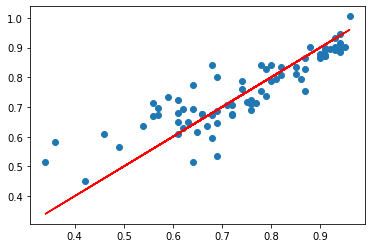

In [114]:
plt.scatter(Y_test, Y_pred)

plt.plot(Y_test, Y_test, 'r')

## Using sklearn Linear Regression 

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def plot_regression(dataframe, features, output):
    """
    use sklearn regression to model features and output a plot to
    demonstrate accuracy of the model
    """
    # Set X, Y
    X = dataframe[features].values
    Y = dataframe[output].values

    # Split data into training data and testing data with ratio 1:4
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
    print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

    # Linear regression on train data
    reg = LinearRegression().fit(X_train, Y_train)
    print("intercept is: ", reg.intercept_)
    print("Coeffients are: ", reg.coef_)

    # Predict data based on trained data
    Y_pred = reg.predict(X_test)
    MSE_test = mean_squared_error(Y_test, Y_pred)
    print('The MSE for test is: ', MSE_test)
    print("Linear regression score: ", r2_score(Y_test, Y_pred))

    # Plot accuracy
    plt.scatter(Y_test, Y_pred)
    plt.plot(Y_test, Y_test, 'r')

#  regression with all features

## method 1 of filling NaN values

(307, 7) (77, 7) (307, 1) (77, 1)
intercept is:  [-1.3662752]
Coeffients are:  [[ 0.00221852  0.00226871  0.12312274  0.00490442  0.02479213  0.01857721
  -0.00209408]]
The MSE for test is:  0.004079121043405803
Linear regression score:  0.8128536599859708


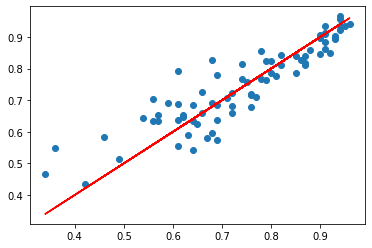

In [116]:
plot_regression(df, ['GRE Score', 'TOEFL Score', 'CGPA', 'University Rating', 'Research', 'LOR ', 'SOP'], ['Chance of Admit'])

## method 2 of filling NaN values

(307, 7) (77, 7) (307, 1) (77, 1)
intercept is:  [-1.3662752]
Coeffients are:  [[ 0.00221852  0.00226871  0.12312274  0.00490442  0.02479213  0.01857721
  -0.00209408]]
The MSE for test is:  0.004079121043405803
Linear regression score:  0.8128536599859708


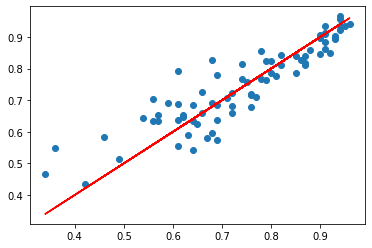

In [117]:
plot_regression(df2, ['GRE Score', 'TOEFL Score', 'CGPA', 'University Rating', 'Research', 'LOR ', 'SOP'], ['Chance of Admit'])

# Linear regression with 3 features based on correlation

## method 1 of filling NaN values

(307, 3) (77, 3) (307, 1) (77, 1)
intercept is:  [-1.67593243]
Coeffients are:  [[0.00275658 0.00253214 0.14592625]]
The MSE for test is:  0.004915085372260905
Linear regression score:  0.7745003817030364


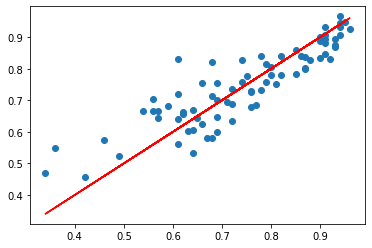

In [118]:
plot_regression(df, ['GRE Score', 'TOEFL Score', 'CGPA'], ['Chance of Admit'])

## method 2 of filling NaN values

(307, 3) (77, 3) (307, 1) (77, 1)
intercept is:  [-1.67593243]
Coeffients are:  [[0.00275658 0.00253214 0.14592625]]
The MSE for test is:  0.004915085372260905
Linear regression score:  0.7745003817030364


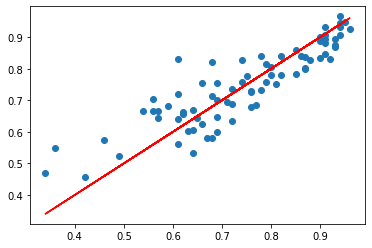

In [119]:
plot_regression(df2, ['GRE Score', 'TOEFL Score', 'CGPA'], ['Chance of Admit'])






# Question 2

In [120]:
def noised_sine_func(time):
    amplitude = np.sin(time * np.pi * 2) * 5
    noise = np.random.normal(1,0.5,time.size)
    amplitude += noise 
    return amplitude

In [121]:
def plot_sine_wave(time, amplitude):
    plt.scatter(time, amplitude)
    plt.title('Noisy Sine wave')
    plt.xlabel('Time')
    plt.ylabel('Amplitude = sin(time)')
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.show()

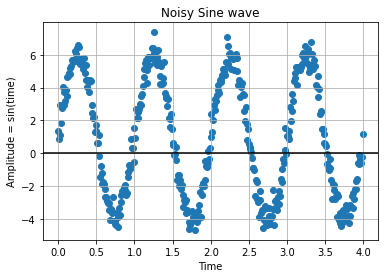

In [122]:

import numpy as np

import matplotlib.pyplot as plt

time = np.arange(0, 4, 0.01)
plot_sine_wave(time, noised_sine_func(time))

## Plot polynomial regression based on degree

In [123]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def plot_poly_regression(X, Y, degree, show_coeficcient=False):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, Y)

    if show_coeficcient:
        print("model intercept: ", model.intercept_)
        print("model coefficients: ", model.coef_)

    # Predict data based on trained data
    Y_pred = model.predict(X_poly)

    MSE_test = mean_squared_error(Y, Y_pred)
    print('The MSE for test is: ', MSE_test)
    print("Linear regression score: ", r2_score(Y, Y_pred))

    # Plotting
    fig = plt.figure()
    ax = fig.add_axes((0, 0, 1, 1))
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='r')

In [124]:
X = time 
Y = noised_sine_func(time)

X = X.reshape(-1, 1)
print(X.shape, Y.shape)

(400, 1) (400,)


## Degree 1

model intercept:  2.1840160403474087
model coefficients:  [ 0.         -0.58300451]
The MSE for test is:  12.179027916188456
Linear regression score:  0.03587568998433466


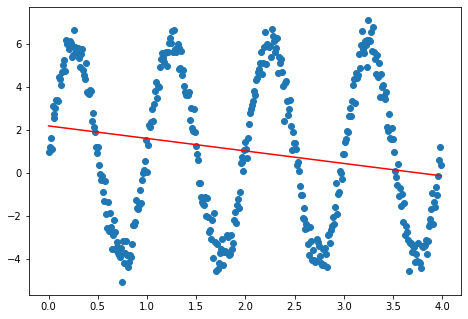

In [125]:
plot_poly_regression(X, Y, 1, True)

## Degree 3

The MSE for test is:  11.344991491396554
Linear regression score:  0.10190023628754086


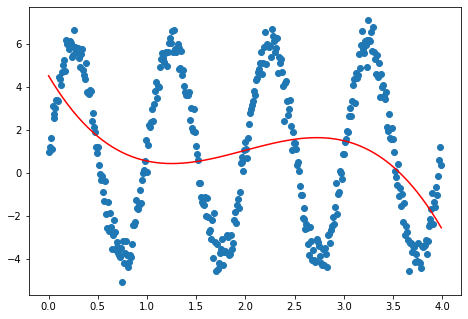

In [126]:
plot_poly_regression(X, Y, 3)

## Degree 7

The MSE for test is:  9.784546269467999
Linear regression score:  0.2254292390340873


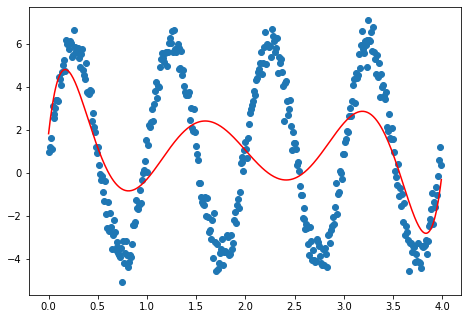

In [127]:
plot_poly_regression(X, Y, 7)

## Degree 11

The MSE for test is:  1.5968138180685976
Linear regression score:  0.873591962251559


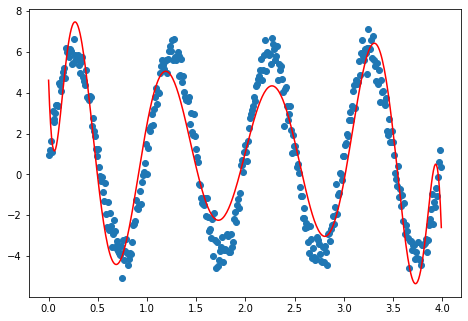

In [128]:
plot_poly_regression(X, Y, 11)

## Degree 11

The MSE for test is:  1.5968138180685976
Linear regression score:  0.873591962251559


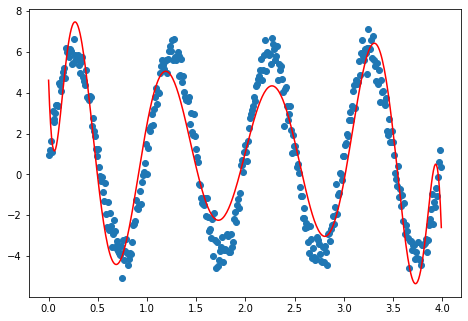

In [129]:
plot_poly_regression(X, Y, 11)

## Degree 16

The MSE for test is:  0.22256190458867206
Linear regression score:  0.9823814064493516


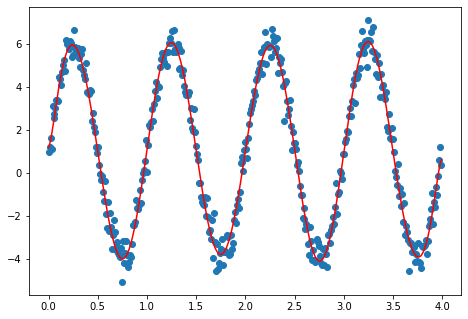

In [130]:
plot_poly_regression(X, Y, 16)

## Degree 20

The MSE for test is:  0.2190098372744431
Linear regression score:  0.982662597565098


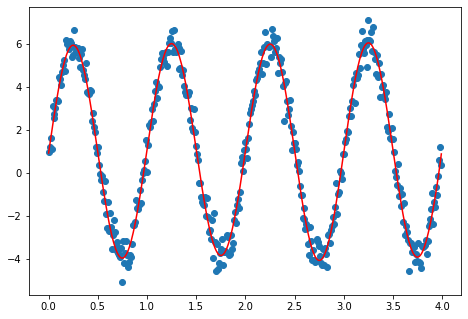

In [131]:
plot_poly_regression(X, Y, 20)